In [1]:
## Exercise with the wine dataset from sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [50]:
#load the data
wine_data = load_wine()
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [12]:
data = pd.DataFrame(data=wine_data.data)
data.columns = wine_data.feature_names


In [28]:
# Create a target column with the dataset target
data['target'] = wine_data.target
data['class'] = data.target
data['class'] = data['class'].apply(lambda x: wine_data['target_names'][x])
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2,class_2


In [29]:
# print the target_names
wine_data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [14]:
# print the first 5 rows of the dataset
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [31]:
#make sure that the columns have the correct label

In [16]:
#print the shape of the dataset
data.shape

(178, 14)

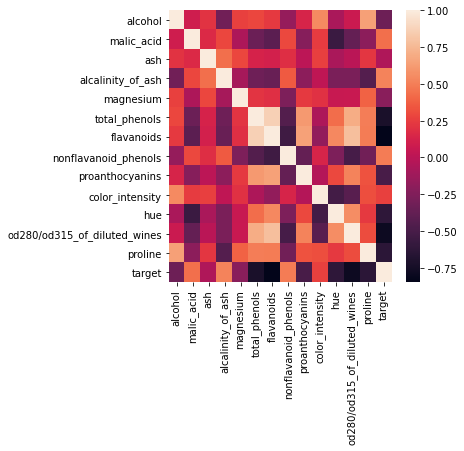

In [17]:
#evaluate features for correlations
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())
plt.show()

In [24]:
#choose features from heat plot
features = ['alcalinity_of_ash', 'total_phenols', 'flavanoids', 'hue', 'proline', 'od280/od315_of_diluted_wines']

In [30]:
#set X to features and y to target
X = data[features]
y = data['target']

In [32]:
#normalize fetures
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [39]:
#split train and test data with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20)
X_train[0:5]

array([[-0.2987667 , -1.11380046, -0.53136913,  0.53767082, -0.84991991,
        -0.48261108],
       [-1.04947918,  1.09741707,  1.12517596,  0.23055711,  0.94931905,
         1.32531572],
       [-0.50896619,  0.2962513 ,  0.34208192,  0.58154421,  0.85378424,
         1.43831115],
       [ 0.60208828, -1.41824346, -0.64180547, -1.69987192, -0.62700535,
        -1.81030733],
       [-0.2687382 ,  0.18408809,  0.38224059,  0.31830389,  0.07358327,
         1.28294244]])

In [40]:
#Now, we classify with a Random forest
rfc = RandomForestClassifier(random_state=99)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=99)

In [41]:
print('Training Score: {}'.format(rfc.score(X_train, y_train)))
print('Testing Score: {}'.format(rfc.score(X_test, y_test)))

Training Score: 1.0
Testing Score: 0.9166666666666666


## Pretty good, huh? 
- What if we want to use another [classifier from sklearn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)?

In [43]:
########################################################
########################################################
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
print('Training Score: {}'.format(knn.score(X_train, y_train)))
print('Testing Score: {}'.format(knn.score(X_test, y_test)))

Training Score: 0.9647887323943662
Testing Score: 0.9166666666666666


In [45]:
########################################################
########################################################
#Support vector machines
svc = SVC(random_state=99)
svc.fit(X_train, y_train)

SVC(random_state=99)

In [47]:
print('Training Score: {}'.format(svc.score(X_train, y_train)))
print('Testing Score: {}'.format(svc.score(X_test, y_test)))

Training Score: 0.9788732394366197
Testing Score: 0.9166666666666666


In [48]:
########################################################
########################################################
#Naive Bayes Guassian
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [49]:
print('Training Score: {}'.format(gnb.score(X_train, y_train)))
print('Testing Score: {}'.format(gnb.score(X_test, y_test)))

Training Score: 0.9507042253521126
Testing Score: 0.9166666666666666
